In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('SharedResponsesSurvey_cleaned_association.csv')
df.head()

,Review_political,AttributeLevel,Saved,ResponseID,UserID,Review_political_cat
0,0.15,Fit,0,e8NsLxv4Yy98wwif4,4.504299e+15,Left
1,0.18,Fit,1,gHsFPRvWvWBwfFj6X,7.205345e+15,Left
2,0.16,Old,0,3Dnf4L6ufAP4aQ6fc,3.101324e+15,Left
3,0.10,Female,0,jnJKNaoyhrtyQnomJ,9.039205e+15,Left
4,0.19,More,0,bZWjcmtcmQibyWf34,9.330259e+15,Left


In [4]:
df['is_save'] = df['Saved'] == 1

# Group the data by 'attribute difference' and 'political label' and calculate the proportion of 'save'
result = df.groupby(['AttributeLevel', 'Review_political_cat'])['is_save'].mean().reset_index(name='save_proportion')

# Sort the results for better readability (optional)
result = result.sort_values(by=['AttributeLevel', 'Review_political_cat'])

print(result)

   AttributeLevel Review_political_cat  save_proportion
0             Fat               Center         0.403749
1             Fat                 Left         0.393558
2             Fat          Left Center         0.397003
3             Fat                Right         0.415320
4             Fat         Right Center         0.404019
5          Female               Center         0.570454
6          Female                 Left         0.549930
7          Female          Left Center         0.558510
8          Female                Right         0.584969
9          Female         Right Center         0.576387
10            Fit               Center         0.602171
11            Fit                 Left         0.606442
12            Fit          Left Center         0.602851
13            Fit                Right         0.592672
14            Fit         Right Center         0.590423
15           High               Center         0.742621
16           High                 Left         0

In [9]:
# print unique attribute levels
print(df['AttributeLevel'].unique())

['Fit' 'Old' 'Female' 'More' 'Fat' 'Pets' 'Less' 'Low' 'Young' 'Hoomans'
 'Male' 'High']


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

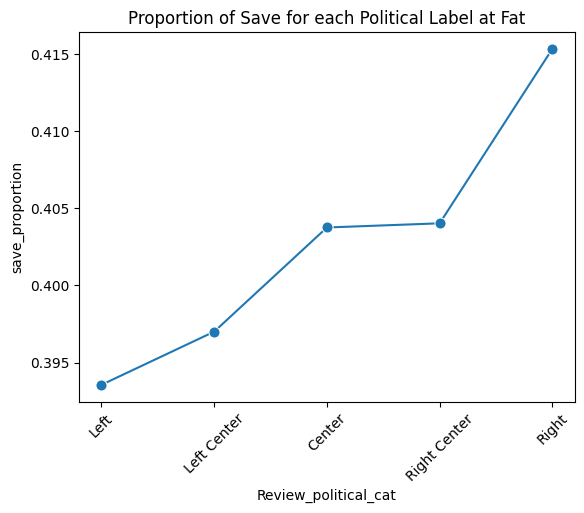

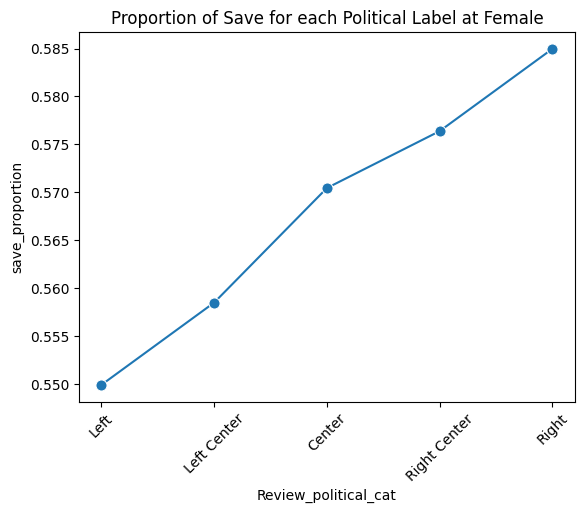

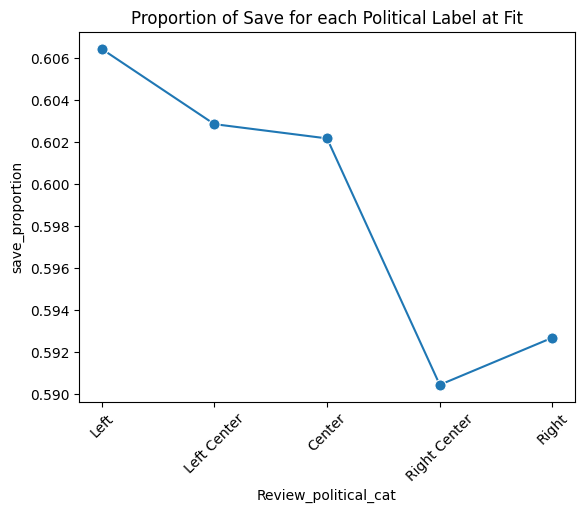

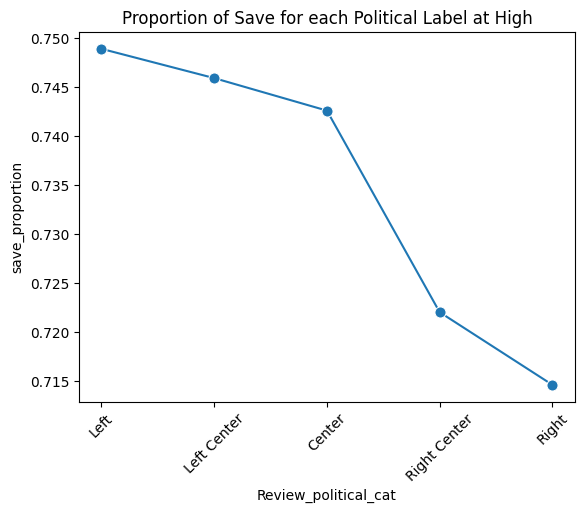

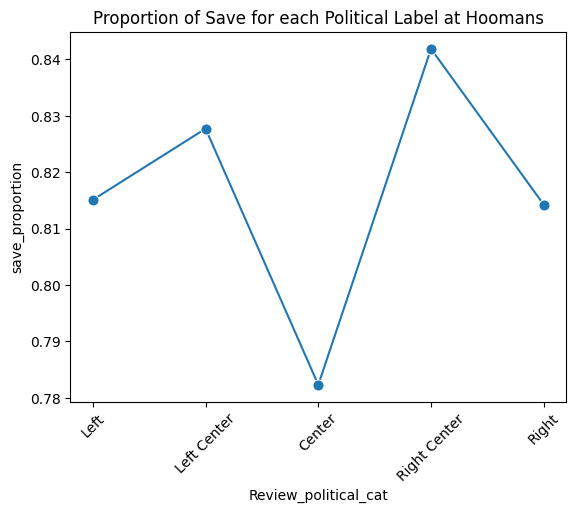

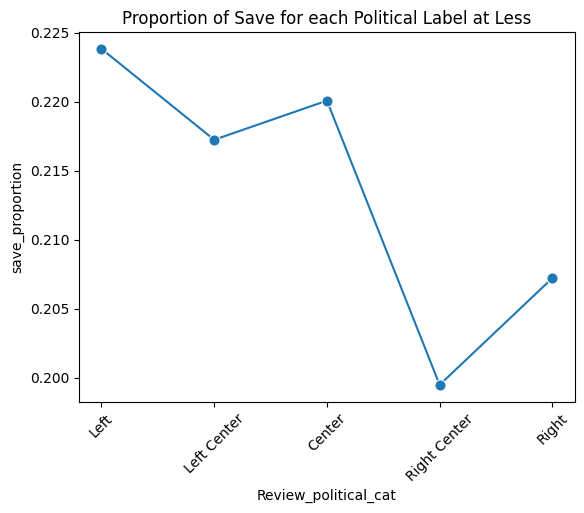

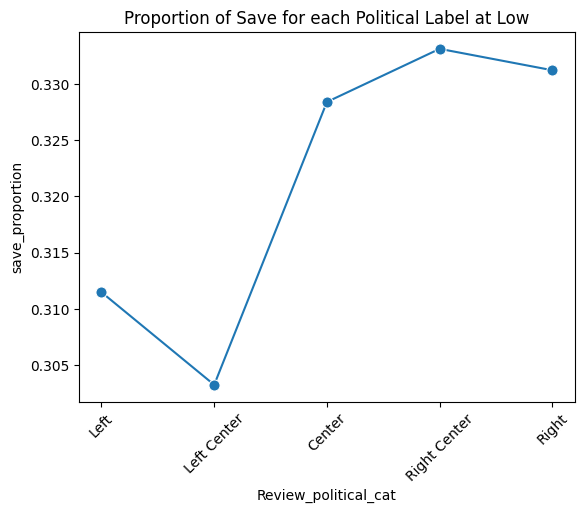

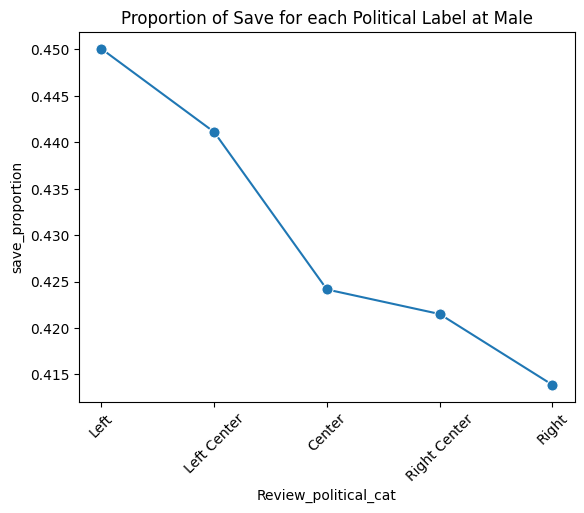

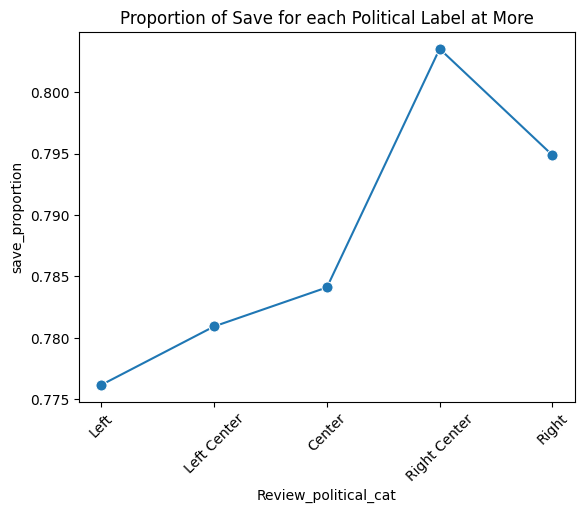

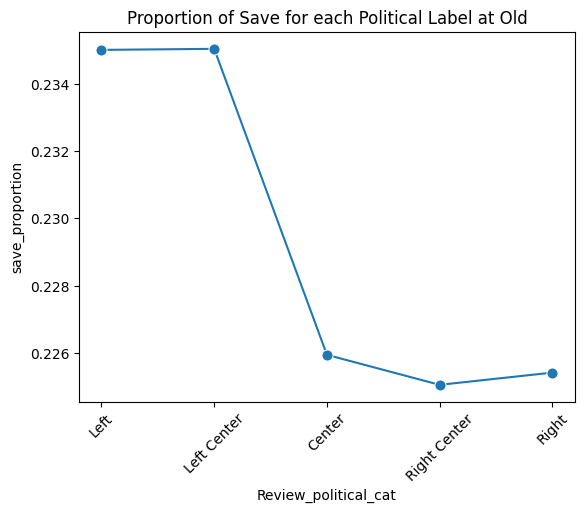

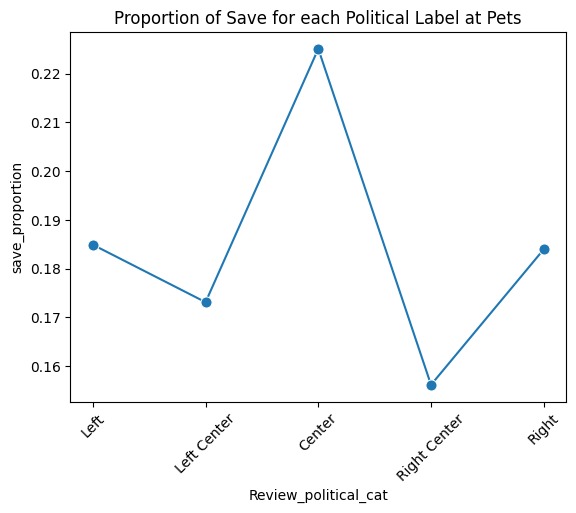

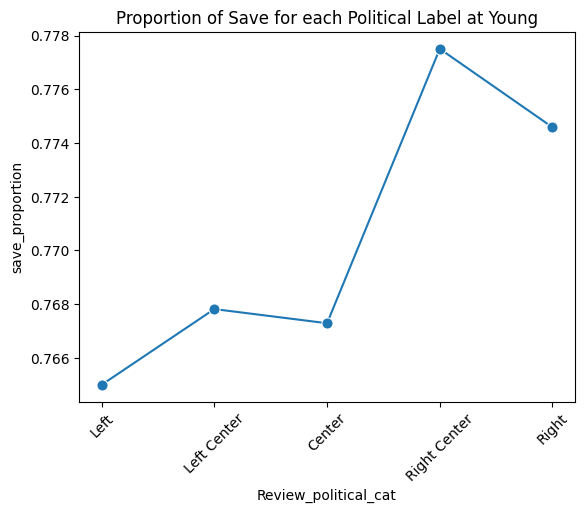

In [8]:
# for each attribute leve, plot a bar chart to show the proportion of 'save' for each political label with order
ordered_political_labels = ['Left', 'Left Center', 'Center', 'Right Center', 'Right']

result['Review_political_cat'] = pd.Categorical(result['Review_political_cat'], categories=ordered_political_labels, ordered=True)

for attribute_level in result['AttributeLevel'].unique():
    sub_df = result[result['AttributeLevel'] == attribute_level].sort_values('Review_political_cat')
    plt.figure()
    sns.lineplot(x='Review_political_cat', y='save_proportion', data=sub_df, 
                 marker='o',  # Add markers for each point
                 markersize=8,  # Adjust the size of the markers if needed
                 )
    plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
    plt.title(f'Proportion of Save for each Political Label at {attribute_level}')
    plt.show()

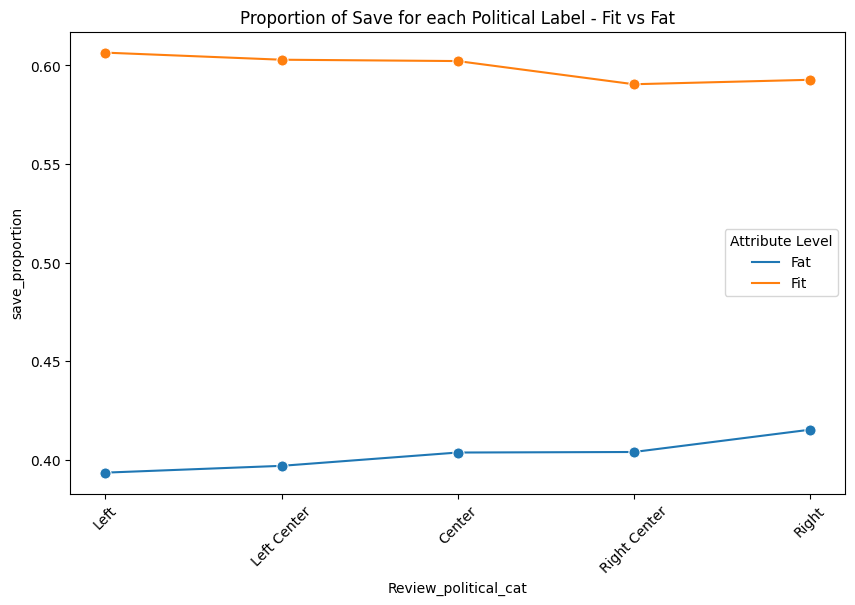

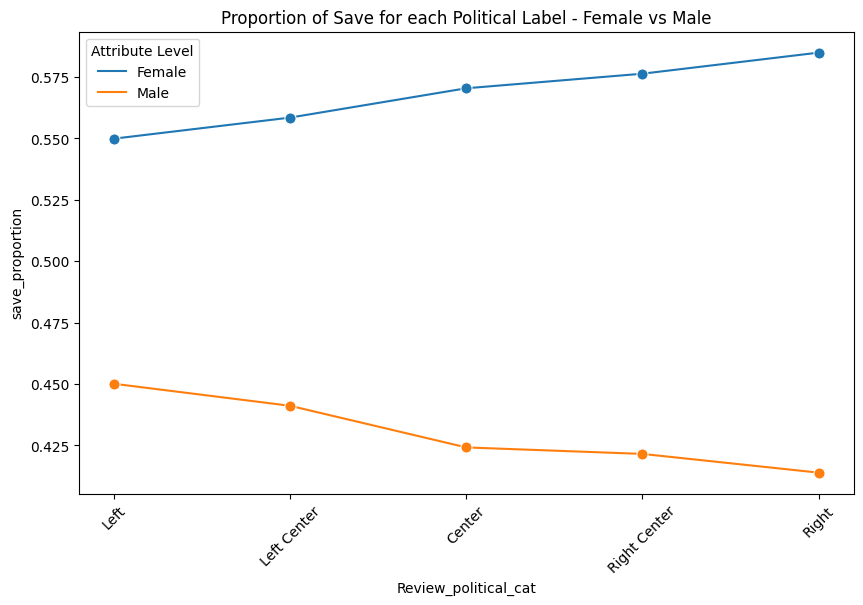

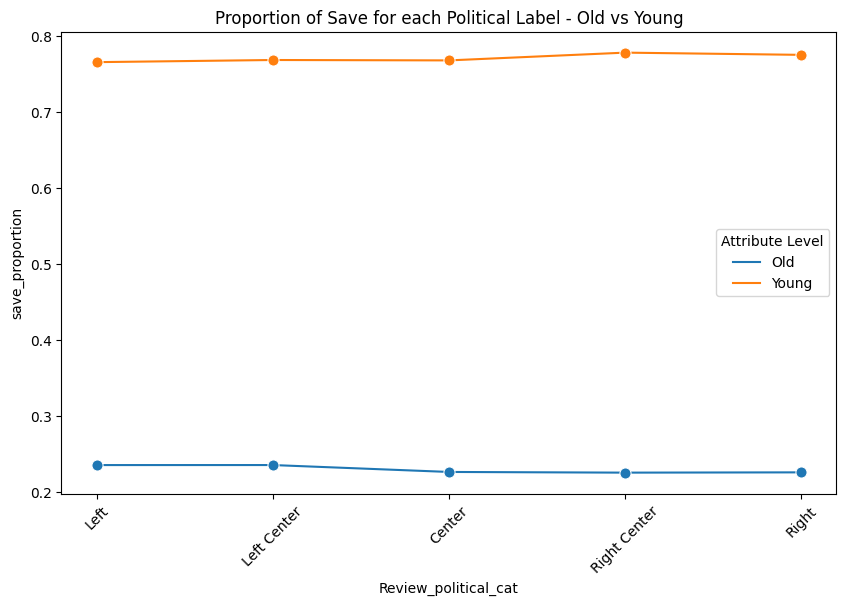

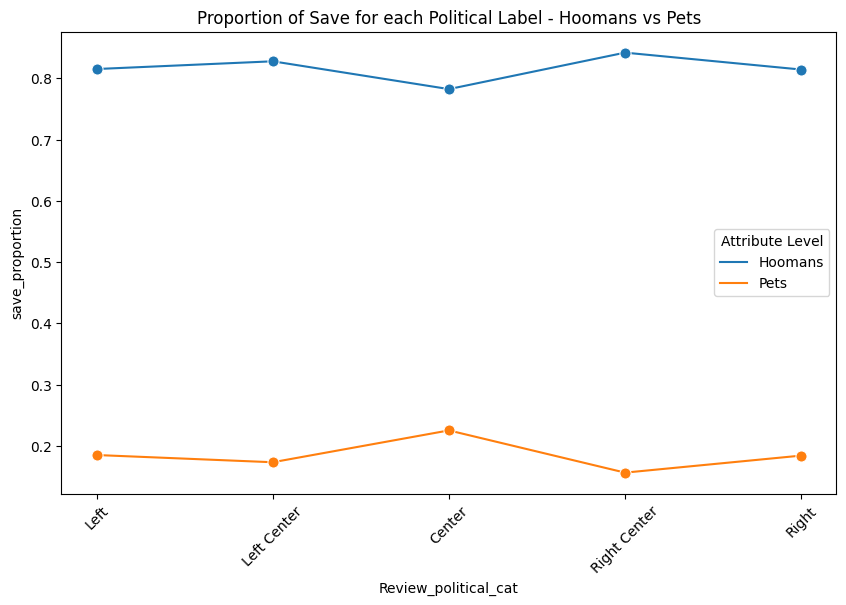

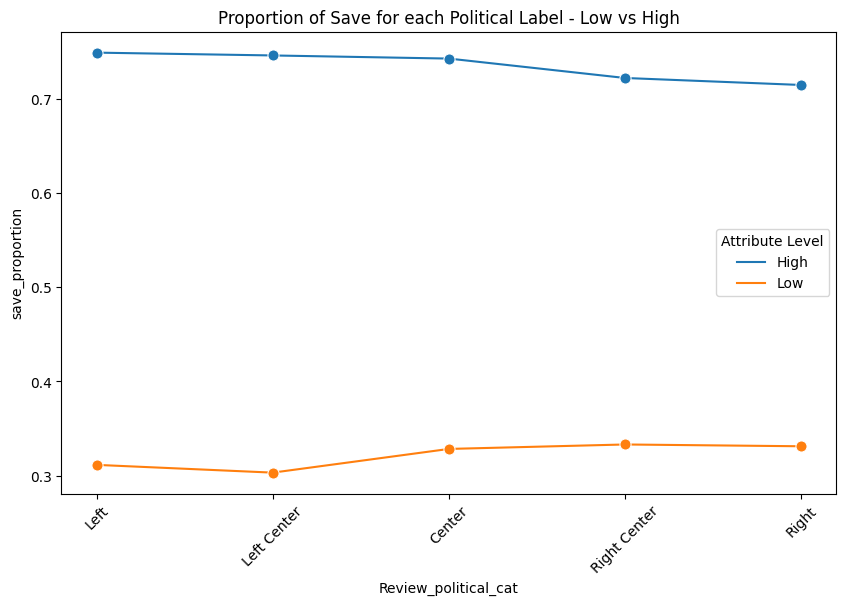

In [12]:
ordered_political_labels = ['Left', 'Left Center', 'Center', 'Right Center', 'Right']

# Set the order for the 'Review_political_cat' as a categorical variable
result['Review_political_cat'] = pd.Categorical(result['Review_political_cat'], categories=ordered_political_labels, ordered=True)

# Define the pairs of attributes you want to compare
attribute_pairs = [
    ('Fit', 'Fat'),
    ('Female', 'Male'),
    ('Old', 'Young'),
    ('Hoomans', 'Pets'),
    ('Low', 'High')
]

# Loop through each pair and plot
for pair in attribute_pairs:
    # Filter the DataFrame for the current pair of attributes
    sub_df = result[result['AttributeLevel'].isin(pair)].sort_values(['Review_political_cat', 'AttributeLevel'])
    
    plt.figure(figsize=(10, 6))  # Set figure size for better visibility
    sns.lineplot(x='Review_political_cat', y='save_proportion', hue='AttributeLevel', data=sub_df, 
                 marker='o',  # Add markers for each point
                 markersize=8,  # Adjust the size of the markers if needed
                 )
    plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
    plt.title(f'Proportion of Save for each Political Label - {pair[0]} vs {pair[1]}')
    plt.legend(title='Attribute Level')
    plt.savefig(f'propotion_graph/Proportion of Save for each Political Label - {pair[0]} vs {pair[1]}.png')
    plt.show()